In [13]:
import datetime
import numpy as np
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
#Created a 11/12/2021 
#Last opened 
print(f'Last edited: {datetime.datetime.now()}')

Last edited: 2021-11-12 10:41:54.543706


In [9]:
filepath  = 'Data/IGF/EXP129_RAW.xlsx'
xls = pd.ExcelFile(filepath)
Data_Dict = defaultdict(lambda: 'Not present')
Sheet_labels = ['0pM','10pM','15pm','20pM','25pM', '50pM', '250pM']
nSheets = len(Sheet_labels)
for i in range(nSheets): 
    sl = Sheet_labels[i]
    df = pd.read_excel(xls, sl ,header=None)
    data = df.to_numpy()
    Data_Dict[sl] = data[:,1:]
    print(f'saved {sl} to dictionary')
Time_points = data[:,0]
# #saving in dictionary 
# Means_dict = defaultdict(lambda: 'Not present')
# Var_dict = defaultdict(lambda:'Not present')
# SecondMoment_dict = defaultdict(lambda:'Not present')
# for key in Data_Dict: 
#     matrix = Data_Dict[key][:,1:]
#     Means_dict[key] = np.mean(matrix, axis = 1)
#     SecondMoment_dict[key] = np.mean(matrix**2, axis = 1)
#     Var_dict[key] = np.var(matrix, axis = 1)

saved 0pM to dictionary
saved 10pM to dictionary
saved 15pm to dictionary
saved 20pM to dictionary
saved 25pM to dictionary
saved 50pM to dictionary
saved 250pM to dictionary


In [28]:
d = data[:,1:]
x0 = d[0,:]
nT , nC = d.shape
x0_mat = np.tile(x0, [nT,1])

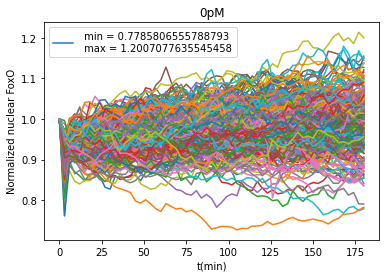

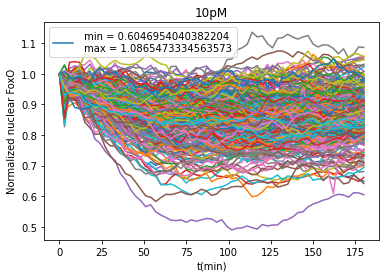

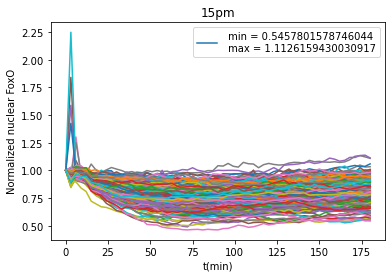

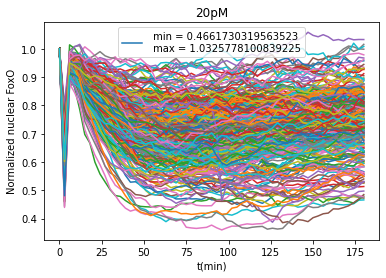

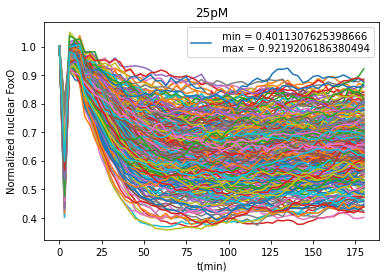

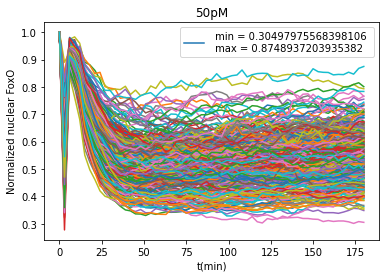

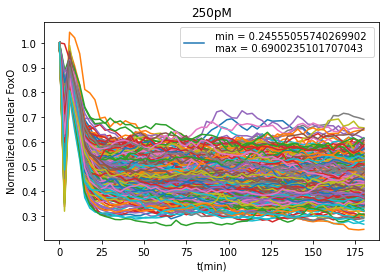

In [30]:
# For each condition determine the smallest and the highest
cond = '10pM'
for cond in Sheet_labels:
    data_cond = Data_Dict[cond]
    # normalize the data
    x0 = data_cond[0,:]
    nT , nC = d.shape
    x0_mat = np.tile(x0, [nT,1])
    data_norm = data_cond/x0_mat
    fr = data_norm[-1,:]
    for i in range(data_cond.shape[1]):
        y = data_cond[:,i]/data_cond[0,i]
        yss = y[-1]
        if i == 0 :
            plt.plot(Time_points, y , label = f' min = {np.min(fr)} \n max = {np.max(fr)}' )
        else:
            plt.plot(Time_points, y)
    plt.title(cond)
    plt.legend()
    plt.xlabel('t(min)')
    plt.ylabel('Normalized nuclear FoxO')
    plt.show()